## Final Project Submission

Please fill out:
* Student name: Mohammed Siddiqui
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_fin = pd.read_csv("tn.movie_budgets.csv")
df_title =pd.read_csv('title.basics.csv')
df_ratings =pd.read_csv('title.ratings.csv')
df_CPI =pd.read_csv('CPIAUCNS.csv')

In [3]:
df_CPI['DATE'] = pd.to_datetime(df_CPI['DATE'])
df_CPI['Multiplier'] = df_CPI['CPIAUCNS'].iloc[-1] / df_CPI['CPIAUCNS']
df_CPI['DATE'] = df_CPI['DATE'].apply(lambda x: x.strftime('%Y-%m'))

In [4]:
df_CPI


,DATE,CPIAUCNS,Multiplier
0,2009-01,211.143,1.233638
1,2009-02,212.193,1.227533
2,2009-03,212.709,1.224556
3,2009-04,213.240,1.221506
4,2009-05,213.856,1.217988
...,...,...,...
139,2020-08,259.918,1.002139
140,2020-09,260.280,1.000745
141,2020-10,260.388,1.000330
142,2020-11,260.229,1.000941


In [5]:
def dollar_to_int(column):
    df_fin[column] = df_fin[column].str.replace(',', '')
    df_fin[column] = df_fin[column].str.replace('$', '')
    df_fin[column] = df_fin[column].astype(np.int64)
    return df_fin

In [6]:
dollar_to_int('domestic_gross')
dollar_to_int('production_budget')
dollar_to_int('worldwide_gross')
df_fin['formatted_date'] = pd.to_datetime(df_fin['release_date'], format='%b %d, %Y')
df_fin['formatted_date'] = df_fin['formatted_date'].apply(lambda x: x.strftime('%Y-%m'))

In [10]:
df_fin

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,formatted_date,DATE,CPIAUCNS,Multiplier
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009-12,2009-12,215.949,1.206183
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05,2011-05,225.964,1.152723
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019-06,2019-06,256.143,1.016909
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05,2015-05,237.805,1.095326
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12,2017-12,246.524,1.056587
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018-12,2018-12,251.233,1.036783
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999-04,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005-07,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015-09,2015-09,237.945,1.094682


In [15]:
df_title.set_index("tconst", inplace=True)
df_ratings.set_index("tconst", inplace=True)

In [16]:
df_imdb = pd.merge(df_title, df_ratings,left_index=True, right_index=True, how='inner')
df_imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [17]:
df_imdb.drop(['original_title'], axis=1, inplace= True)


In [18]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   start_year       73856 non-null  int64  
 2   runtime_minutes  66236 non-null  float64
 3   genres           73052 non-null  object 
 4   averagerating    73856 non-null  float64
 5   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.9+ MB


What are the smart people doing?,What are the dumb people doing?

In [19]:
df_fin =df_fin.drop(['id'], axis=1)
df_fin =df_fin.drop(['release_date'], axis=1)

In [8]:
df_fin = pd.merge(df_fin, df_CPI,left_on='formatted_date', right_on='DATE', how='left')

In [9]:
df_fin

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,formatted_date,DATE,CPIAUCNS,Multiplier
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009-12,2009-12,215.949,1.206183
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011-05,2011-05,225.964,1.152723
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019-06,2019-06,256.143,1.016909
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015-05,2015-05,237.805,1.095326
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017-12,2017-12,246.524,1.056587
...,...,...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018-12,2018-12,251.233,1.036783
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999-04,NaN,NaN,NaN
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005-07,NaN,NaN,NaN
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015-09,2015-09,237.945,1.094682


In [11]:
df_fin= df_fin[df_fin['domestic_gross'] != 0]
df_fin= df_fin[df_fin['worldwide_gross'] != 0]
df_fin= df_fin[df_fin['production_budget'] >= 70000000]

In [12]:
df_imdb =df_imdb[df_imdb['numvotes'] > 1000]

In [13]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9611 entries, tt0069049 to tt9815714
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    9611 non-null   object 
 1   start_year       9611 non-null   int64  
 2   runtime_minutes  9603 non-null   float64
 3   genres           9609 non-null   object 
 4   averagerating    9611 non-null   float64
 5   numvotes         9611 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 525.6+ KB


In [14]:
df_all = pd.merge(df_imdb, df_fin,left_on='primary_title', right_on='movie', how='inner')

In [17]:
df_all

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,production_budget,domestic_gross,worldwide_gross,formatted_date
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013-12-25
1,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,215000000,652270625,1648854864,2015-06-12
2,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,Tangled,260000000,200821936,586477240,2010-11-24
3,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,John Carter,275000000,73058679,282778100,2012-03-09
4,The A-Team,2010,117.0,"Action,Adventure,Thriller",6.8,235256,The A-Team,110000000,77222099,177241171,2010-06-11
...,...,...,...,...,...,...,...,...,...,...,...
324,Aladdin,2019,128.0,"Adventure,Comedy,Family",7.4,57549,Aladdin,182000000,246734314,619234314,2019-05-24
325,Smallfoot,2018,96.0,"Adventure,Animation,Comedy",6.7,23295,Smallfoot,80000000,83240103,213691277,2018-09-28
326,Wonder Park,2019,85.0,"Adventure,Animation,Comedy",5.7,3091,Wonder Park,100000000,45216793,115149422,2019-03-15
327,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,Dark Phoenix,350000000,42762350,149762350,2019-06-07


<AxesSubplot:xlabel='production_budget', ylabel='Count'>

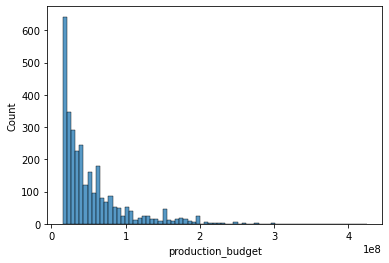

In [17]:
sns.histplot(df_fin['production_budget'])

In [18]:
df_all['ratio'] =df_all['worldwide_gross']/df_all['production_budget']

<AxesSubplot:xlabel='production_budget', ylabel='domestic_gross'>

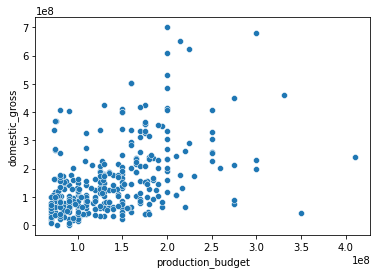

In [20]:
sns.scatterplot(x=df_all['production_budget'], y=df_all['domestic_gross'])

In [22]:
df_all.head(20)

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,movie,production_budget,domestic_gross,worldwide_gross,formatted_date,ratio
0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,91000000,58236838,187861183,2013-12-25,2.064409
1,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,215000000,652270625,1648854864,2015-06-12,7.669092
2,Tangled,2010,100.0,"Adventure,Animation,Comedy",7.8,366366,Tangled,260000000,200821936,586477240,2010-11-24,2.255682
3,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,John Carter,275000000,73058679,282778100,2012-03-09,1.028284
4,The A-Team,2010,117.0,"Action,Adventure,Thriller",6.8,235256,The A-Team,110000000,77222099,177241171,2010-06-11,1.611283
5,Real Steel,2011,127.0,"Action,Drama,Family",7.1,283534,Real Steel,110000000,85463309,263880341,2011-10-07,2.398912
6,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,Toy Story 3,200000000,415004880,1068879522,2010-06-18,5.344398
7,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,Alita: Battle Angel,170000000,85710210,402976036,2019-02-14,2.370447
8,Shazam!,2019,132.0,"Action,Adventure,Comedy",7.4,109051,Shazam!,85000000,139606856,362899733,2019-04-05,4.269409
9,Puss in Boots,2011,90.0,"Action,Adventure,Animation",6.6,133355,Puss in Boots,130000000,149260504,554987477,2011-10-28,4.269134
